# Pose estimation notebook

Visualizing pose estimation results on sample images

## 1. Imports

In [2]:
#!pip install tensorflow==2.10.1 
#!pip install tensorflow_docs
#!pip install tensorflow_hub==0.12.0
#!pip install numpy==1.23.4
#!pip install pandas==1.5.1
#!pip install matplotlib==3.6.2

import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import time
import random
import json
from pprint import pprint

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

import imageio
from IPython.display import HTML, display, Image


In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append(os.path.join("..", "modules"))

import file_utils
import model_utils
import tensor_utils
import visualisation_utils
import benchmark_utils
import accuracy_utils

## 2. Sample image

### 2.1 Download sample image

In [3]:
url = "https://images.pexels.com/photos/4384679/pexels-photo-4384679.jpeg"
images_path = os.path.join(os.getcwd(), "sample_images")
output_filename = "sample_image.jpeg"

image_path = file_utils.download_file_to_folder(url, images_path, output_filename, overwrite = False)

File '/home/karstu/GIT/ai_and_web_applications_project/notebooks/sample_images/sample_image.jpeg' already found, not downloading.


### 2.2 Preview image

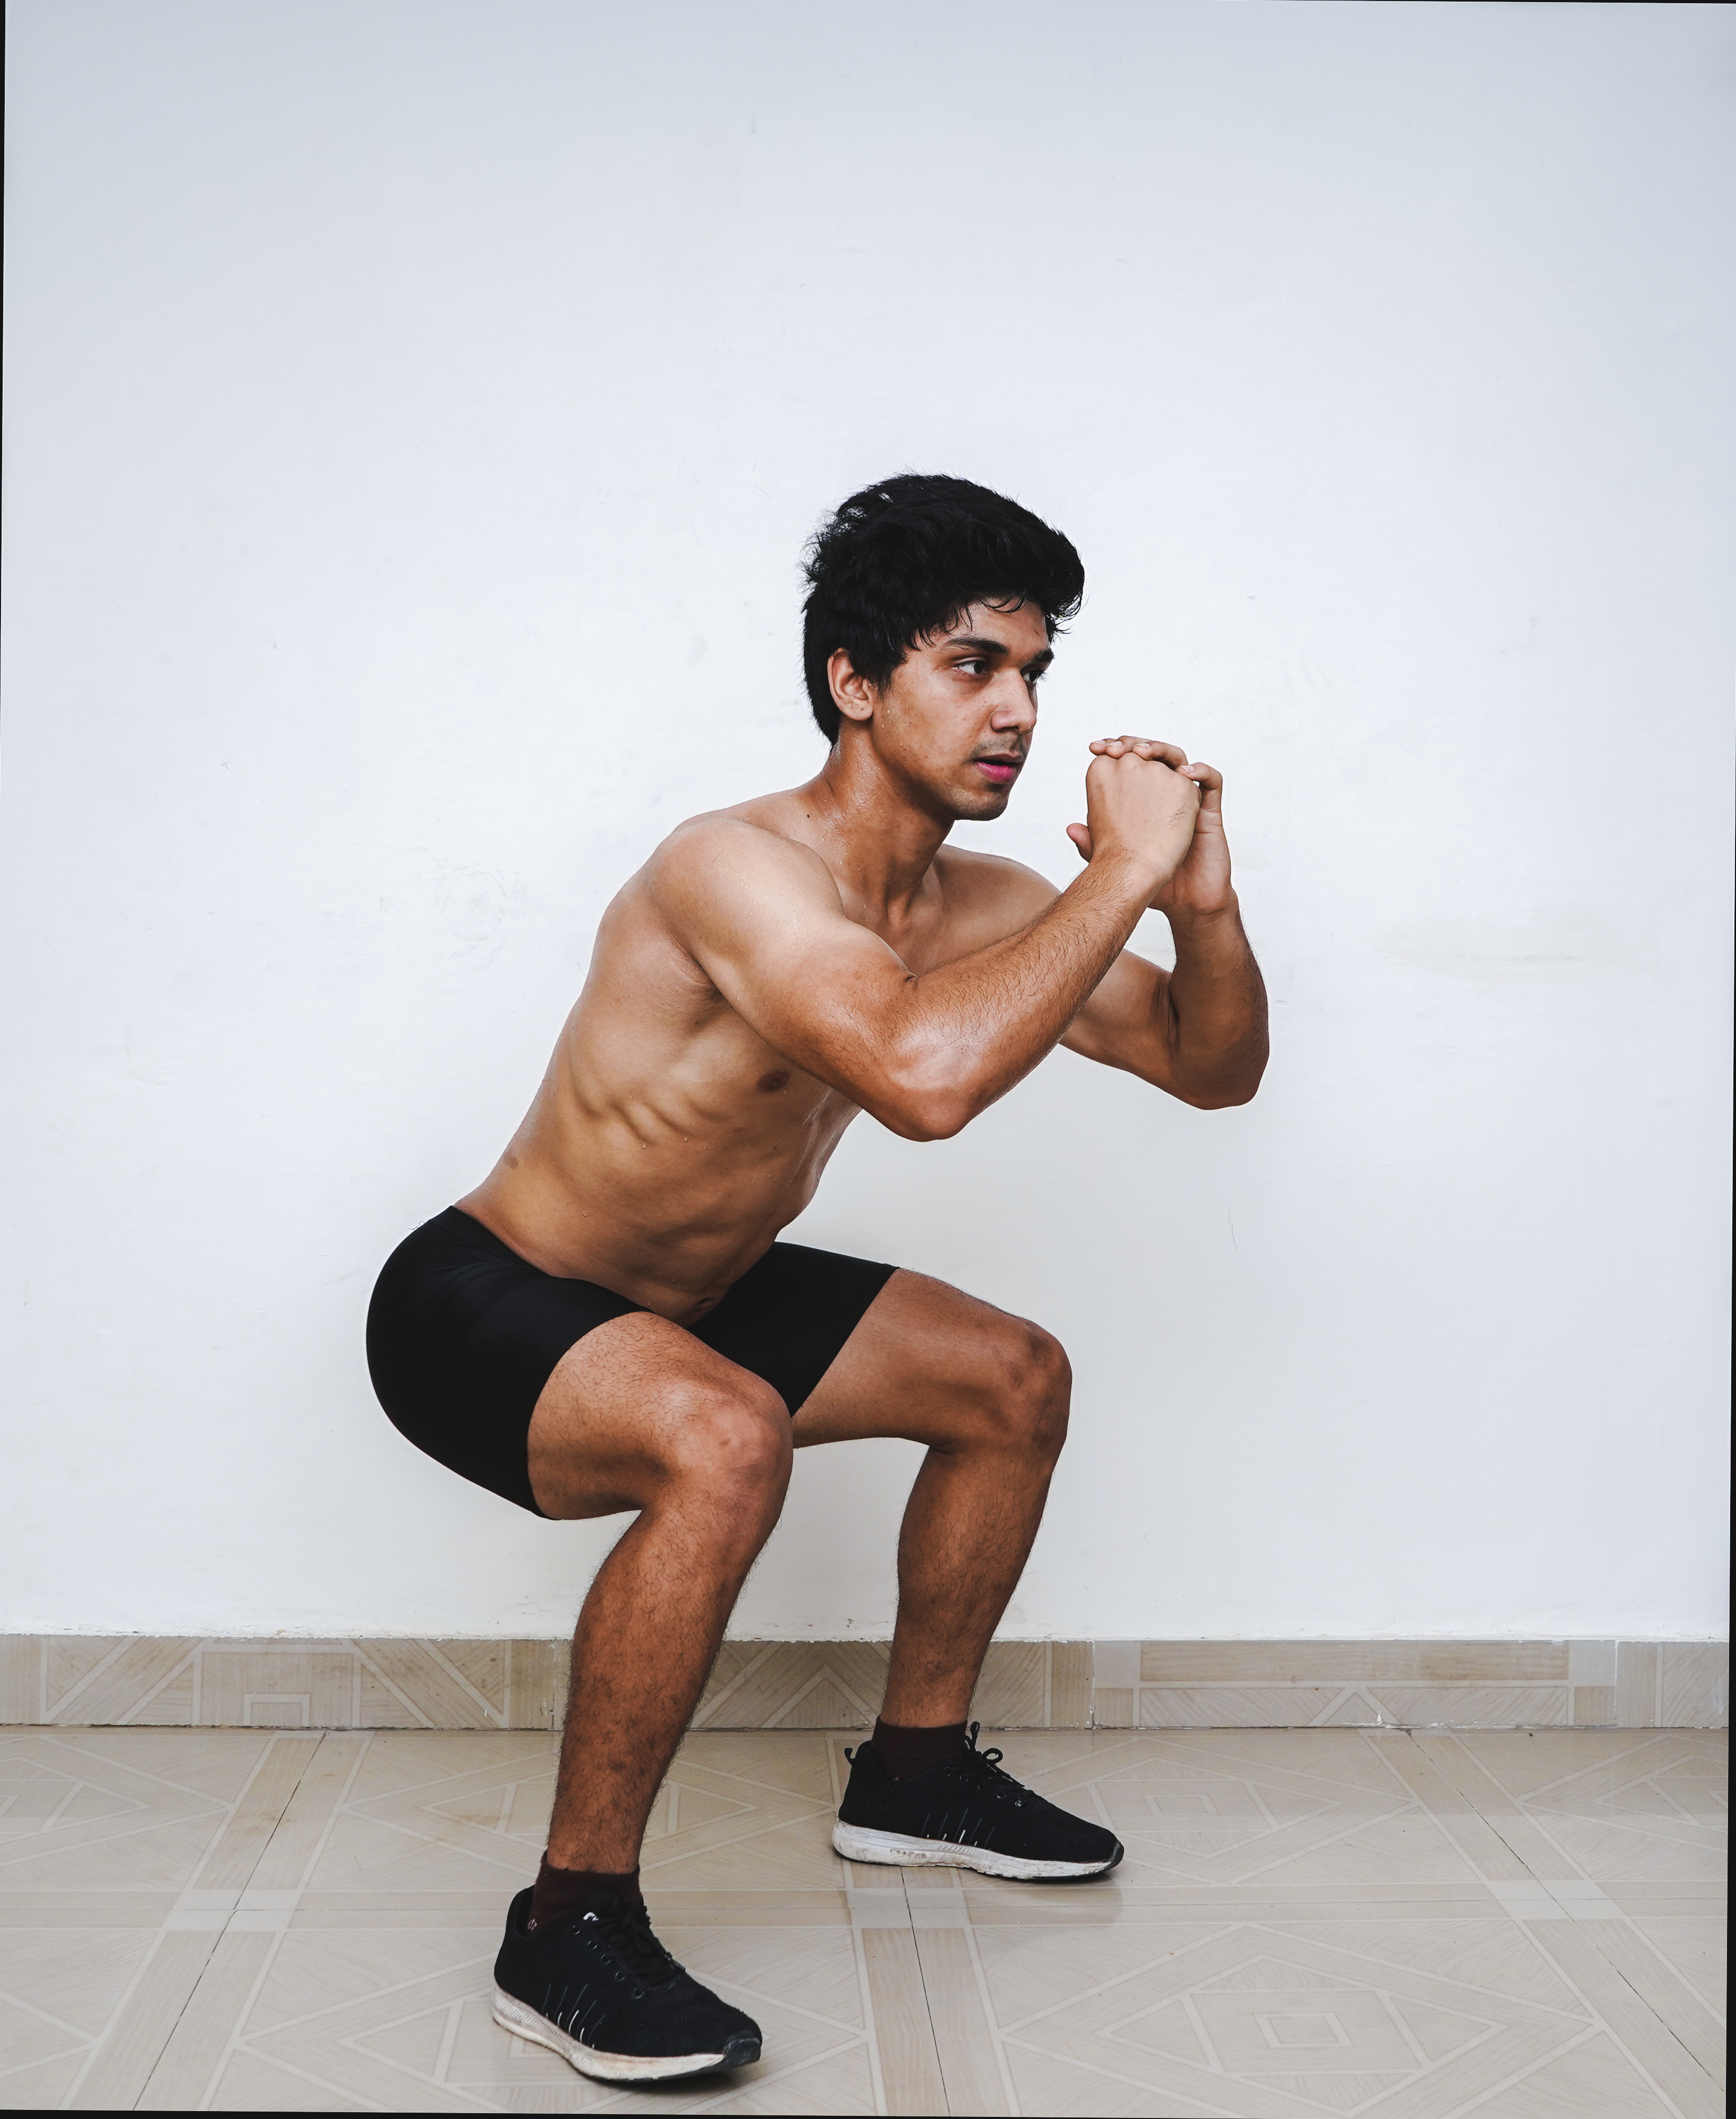

In [4]:
display(Image(filename=image_path))

## 3. MoveNet

### 3.1 Select and download model

In [5]:
model_name = "movenet_lightning_f16_tflite"
keypoint_detector, input_size = model_utils.select_model(model_name)

- Model 'movenet_lightning_f16_tflite.tflite' found.


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


### 3.2 Convert image to tensor and resize image tensor

In [6]:
image_tensor = tensor_utils.convert_image_to_tensor(image_path)
print(f"Shape of image tensor before resizing: {image_tensor.shape}")

resized_image_tensor = tensor_utils.resize_image_tensor(image_tensor, input_size)
print(f"Shape of image tensor after resizing: {resized_image_tensor.shape}")

Shape of image tensor before resizing: (3989, 3268, 3)
Shape of image tensor after resizing: (1, 192, 192, 3)


2022-12-16 11:14:22.791810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/karstu/GIT/ai_and_web_applications_project/.venv/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2022-12-16 11:14:22.791858: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 11:14:22.791883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DKAJLT144): /proc/driver/nvidia/version does not exist
2022-12-16 11:14:22.792316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in p

### 3.3 Run model inference

In [7]:
keypoints_with_scores = keypoint_detector(resized_image_tensor)
print(f"Shape of keypoints_with_scores: {keypoints_with_scores.shape}")
print(f"keypoints_with_scores example row: {keypoints_with_scores[0][0][0]}")
print(f"In above, two first number is Y coordinate, second X coordinate, third confidence value between 0 and 1.")

Shape of keypoints_with_scores: (1, 1, 17, 3)
keypoints_with_scores example row: [0.33035612 0.57337606 0.3414415 ]
In above, two first number is Y coordinate, second X coordinate, third confidence value between 0 and 1.


### 3.4 Visualize image with predictions

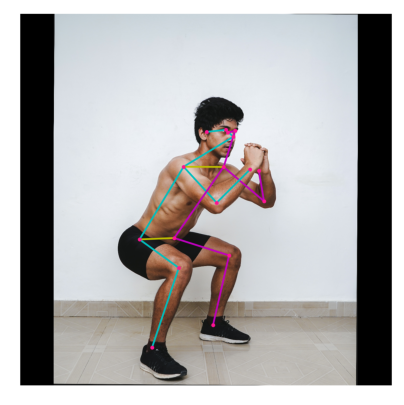

In [8]:
visualisation_utils.visualize_image_with_keypoints(image_tensor, keypoints_with_scores)


## 4. BlazePose

### 4.1 Select and download model

In [9]:
model_name = "blazepose"
keypoint_detector, _ = model_utils.select_model(model_name)

### 4.2 Convert image to tensor and resize image tensor

In [10]:
image_tensor = tensor_utils.convert_image_to_tensor(image_path)
print(f"Shape of image tensor before resizing: {image_tensor.shape}")
print(image_tensor.shape[0])

resized_image_tensor = tensor_utils.resize_image_tensor(image_tensor, input_size)
print(f"Shape of image tensor after resizing: {resized_image_tensor.shape}")

Shape of image tensor before resizing: (3989, 3268, 3)
3989
Shape of image tensor after resizing: (1, 192, 192, 3)


### 4.3 Run model inference

In [11]:
results = keypoint_detector(image_path)

keypoints_with_scores = accuracy_utils.convert_blazepose_results_to_movenet_keypoints_with_scores(results)

print(f"Shape of keypoints_with_scores: {keypoints_with_scores.shape}")
print(f"keypoints_with_scores example row: {keypoints_with_scores[0][0][0]}")
print(f"In above, two first number is Y coordinate, second X coordinate, third confidence value between 0 and 1.")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Shape of keypoints_with_scores: (1, 1, 17, 3)
keypoints_with_scores example row: [0.34031531 0.57026654 0.99997056]
In above, two first number is Y coordinate, second X coordinate, third confidence value between 0 and 1.


### 4.4 Visualize image with predictions

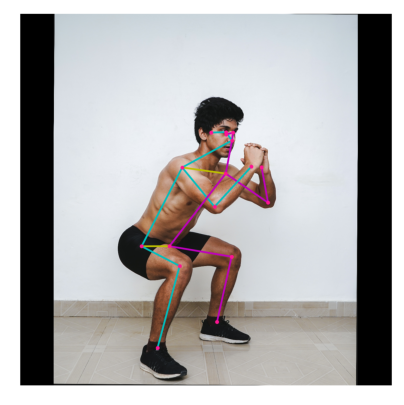

In [12]:
visualisation_utils.visualize_image_with_keypoints(image_tensor, keypoints_with_scores)


## 5 PoseNet

### 5.1 Select and download model

In [13]:
model_name = "posenet_v1_metadata"
keypoint_detector, input_size = model_utils.select_model(model_name)
input_size

- Model 'posenet_v1_metadata.tflite' found.


(353, 257)

### 5.2 Convert image to tensor and resize image tensor

In [14]:
image_tensor = tensor_utils.convert_image_to_tensor(image_path)
print(f"Shape of image tensor before resizing: {image_tensor.shape}")

resized_image_tensor = tensor_utils.resize_image_tensor(image_tensor, input_size)
print(f"Shape of image tensor after resizing: {resized_image_tensor.shape}")

Shape of image tensor before resizing: (3989, 3268, 3)
Shape of image tensor after resizing: (1, 353, 257, 3)


### 5.3 Run model inference

Converting of PoseNet results to match MoveNet 'keypoints_with_scores' not working.

In [15]:
results = keypoint_detector(resized_image_tensor)
# keypoints_with_scores = accuracy_utils.convert_posenet_results_to_movenet_keypoints_with_scores(results)

# print(f"Shape of keypoints_with_scores: {keypoints_with_scores.shape}")
# print(f"keypoints_with_scores example row: {keypoints_with_scores[0][0][0]}")
# print(f"In above, two first number is Y coordinate, second X coordinate, third confidence value between 0 and 1.")

### 5.4 Visualize image with predictions

In [16]:
# visualisation_utils.visualize_image_with_keypoints(image_tensor, keypoints_with_scores)


## 6. Test using MPII human pose dataset

Converted annotations can be downloaded here: https://download.openmmlab.com/mmpose/datasets/mpii_annotations.tar

Let's use one sample image and one annotation extracted from 'mpii_val.json' file.

### 6.1 Sample image

Using only one sample image "004645041.jpg" which is placed in sample_images folder.

In [17]:
images_path = os.path.join(os.getcwd(), "sample_images")
extensions = ('.png', '.jpg', '.jpeg')
filenames = ["004645041.jpg"]

image_paths = file_utils.filepaths_from_path(images_path, extensions, filenames=filenames)
image_path = image_paths[0]
print(image_path)

/home/karstu/GIT/ai_and_web_applications_project/notebooks/sample_images/004645041.jpg


### 6.3 Preview image

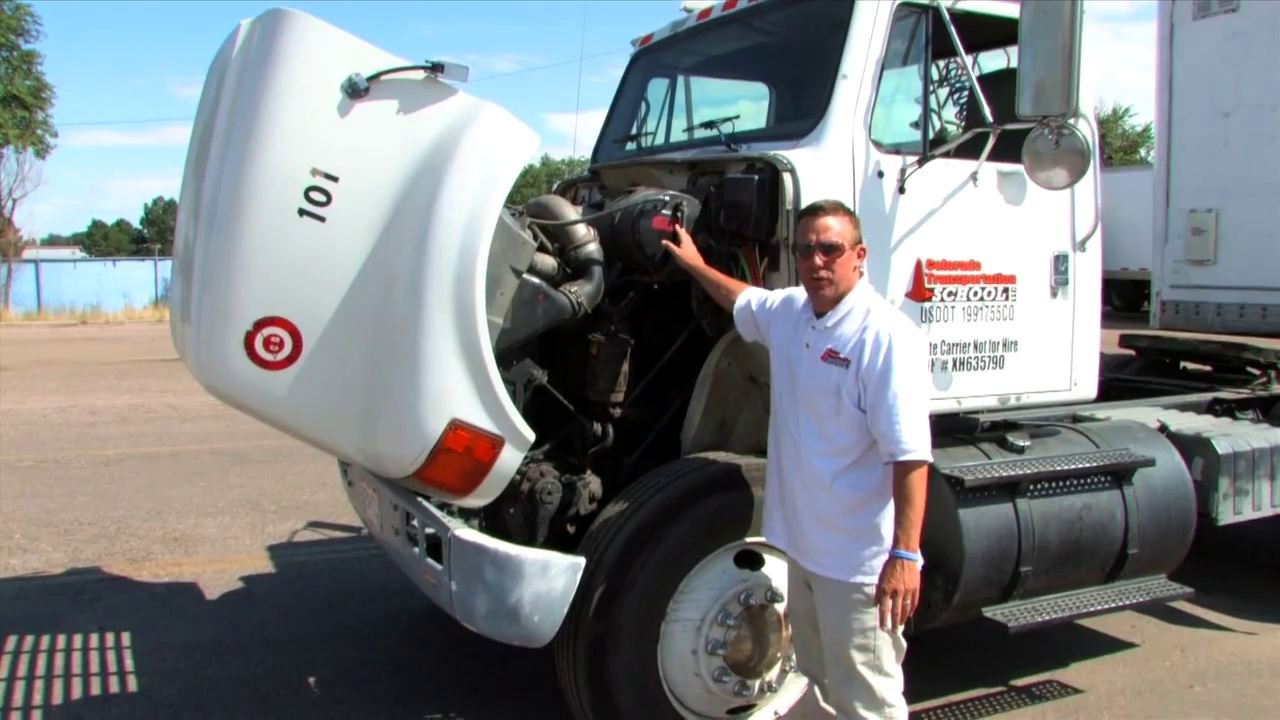

In [18]:
display(Image(filename=image_path))

### 6.4 Select model for comparison

In [19]:
model_name = "movenet_lightning_f16_tflite"
keypoint_detector, input_size = model_utils.select_model(model_name)

- Model 'movenet_lightning_f16_tflite.tflite' found.


### 6.5 Convert image to tensor and resize image tensor

In [20]:
print(os.path.basename(image_path))

image_tensor = tensor_utils.convert_image_to_tensor(image_path)
print(f"Shape of image tensor before resizing: {image_tensor.shape}")

resized_image_tensor = tensor_utils.resize_image_tensor(image_tensor, input_size)
print(f"Shape of image tensor after resizing: {resized_image_tensor.shape}")

004645041.jpg
Shape of image tensor before resizing: (720, 1280, 3)
Shape of image tensor after resizing: (1, 192, 192, 3)


### 6.6 Run model inference

In [21]:
keypoints_with_scores = keypoint_detector(resized_image_tensor)

print(f"Shape of keypoints_with_scores: {keypoints_with_scores.shape}\n")
print(f"'keypoints_with_scores' example row: {keypoints_with_scores[0][0][0]}")
print(f"In above, two first numbers are coordinates, last is confidence value between 0 and 1.")

print("\n\n", keypoints_with_scores)

Shape of keypoints_with_scores: (1, 1, 17, 3)

'keypoints_with_scores' example row: [0.41157117 0.63955337 0.47454673]
In above, two first numbers are coordinates, last is confidence value between 0 and 1.


 [[[[0.41157117 0.63955337 0.47454673]
   [0.40219197 0.6513817  0.70721984]
   [0.4033519  0.62817657 0.5444002 ]
   [0.41295707 0.66901433 0.52551794]
   [0.41118005 0.6166485  0.5860492 ]
   [0.47592992 0.6771529  0.4096163 ]
   [0.45122108 0.60193825 0.40937287]
   [0.55618846 0.7100508  0.36502543]
   [0.45483    0.5539046  0.43545106]
   [0.63467366 0.7065587  0.4818745 ]
   [0.407294   0.5101972  0.4238517 ]
   [0.6344313  0.67892057 0.6141768 ]
   [0.6363292  0.61742854 0.50994515]
   [0.7484526  0.68364424 0.43436337]
   [0.7383281  0.6321048  0.31753576]
   [0.7739041  0.68808746 0.14262745]
   [0.77429914 0.6426966  0.1314291 ]]]]


### 6.7 Visualize image with predictions

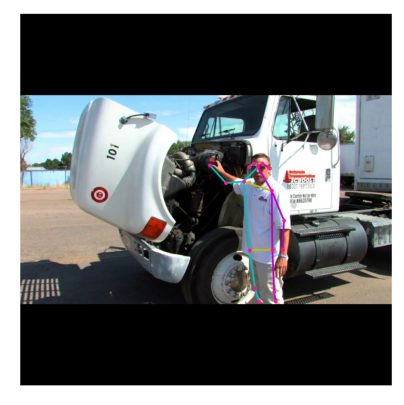

In [22]:
visualisation_utils.visualize_image_with_keypoints(image_tensor, keypoints_with_scores)

### 6.8 Open sample annotation

Pre converted annotations for MPII images can be found here: https://mmpose.readthedocs.io/en/latest/tasks/2d_body_keypoint.html

The annotations can be downloaded from here: https://download.openmmlab.com/mmpose/datasets/mpii_annotations.tar

One annotation has been extracted from file 'mpii_val.json' and saved as 'example_mpii_annotations.json'.

In [23]:
sample_annotation_path = os.path.join(os.getcwd(), "example_mpii_annotations.json")
annotations = file_utils.open_json_as_dict(sample_annotation_path)

### 6.9 Find annotation matching the image file name

In [24]:
annotation = accuracy_utils.get_matching_annotation_from_data(annotations, image_path)
pprint(annotation)

{'center': [809.0, 403.0],
 'image': '004645041.jpg',
 'joints': [[-1.0, -1.0],
            [804.0, 659.0],
            [786.0, 498.0],
            [868.0, 509.0],
            [860.0, 693.0],
            [-1.0, -1.0],
            [827.0, 504.0],
            [840.0, 314.0],
            [838.9079, 308.9326],
            [816.0921, 203.0674],
            [698.0, 264.0],
            [740.0, 297.0],
            [790.0, 300.0],
            [889.0, 328.0],
            [915.0, 452.0],
            [906.0, 553.0]],
 'joints_vis': [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'scale': 3.248877}


### 6.10 Examine annotation data

Annotations are dictionarys which have 'center', 'image', 'joints', 'joints_vis' and 'scale' keys.

- center and scale are for the size of the bounding box around the person.
- joints_vis lists which joints are visible in the image
- joints is a list of coordinates of the keypoints
    - [-1.0, -1.0] means that the keypoint is not visible

### 6.11 Convert annotation item to list like keypoints with scores

Keypoints are not in the same order as the TensorFlow's keypoint list. The list has to be converted and the coordinates scaled.

MPII annotation does not contain all the same keypoints as the TensorFlow's prediction.

Here's a table which shows the differences.

| Keypoints in MPII annotation           | Keypoints by TensorFlow models |
|---                                     |                             ---|
| 0 - r ankle                            | 16 - right_ankle |
| 1 - r knee                             | 14 - right_knee |
| 2 - r hip                              | 12 - right_hip |
| 3 - l hip                              | 11 - left_hip |
| 4 - l knee                             | 13 - left_knee  |
| 5 - l ankl                             | 15 - left_ankle |
| 6 - pelvis                             | no match |
| 7 - thorax                             | no match |
| 8 - upper neck                         | no match |
| 9 - head top                           | no match |
| 10 - r wrist                           | 10 - right_wrist |
| 11 - r elbow                           | 8 - right_elbow |
| 12 - r shoulder                        | 6 - right_shoulder |
| 13 - l shoulder                        | 5 - left_shoulder |
| 14 - l elbow                           | 7 - left_elbow |
| 15 - l wrist                           | 9 - left_wrist |

In [25]:
img_size = {
    "x": image_tensor.shape[1],
    "y": image_tensor.shape[0]
}

actual_keypoints_with_scores = accuracy_utils.convert_annotation_item_to_keypoints_with_scores(annotation, img_size)
pprint(actual_keypoints_with_scores)

array([[[[-1.        , -1.        ,  0.        ],
         [-1.        , -1.        ,  0.        ],
         [-1.        , -1.        ,  0.        ],
         [-1.        , -1.        ,  0.        ],
         [-1.        , -1.        ,  0.        ],
         [ 0.475     ,  0.69453125,  1.        ],
         [ 0.453125  ,  0.6171875 ,  1.        ],
         [ 0.571875  ,  0.71484375,  1.        ],
         [ 0.45078125,  0.578125  ,  1.        ],
         [ 0.65078125,  0.7078125 ,  1.        ],
         [ 0.425     ,  0.5453125 ,  1.        ],
         [ 0.61640625,  0.678125  ,  1.        ],
         [ 0.6078125 ,  0.6140625 ,  1.        ],
         [ 0.76015625,  0.671875  ,  1.        ],
         [ 0.73359375,  0.628125  ,  1.        ],
         [-1.        , -1.        ,  0.        ],
         [-1.        , -1.        ,  0.        ]]]])


### 6.12 Visualize the actual keypoints

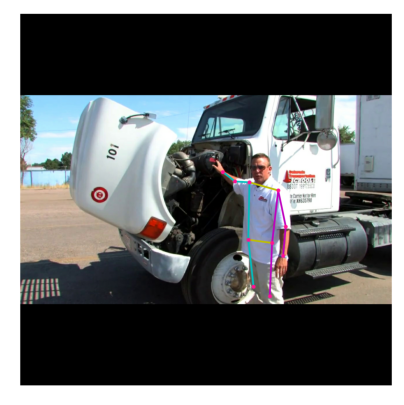

In [26]:
visualisation_utils.visualize_image_with_keypoints(image_tensor, actual_keypoints_with_scores)

### 6.13 Calculate accuracy of the prediction

Compare actual and predicted keypoints.

Comparison is done only to the points which are present in the annotations. So the accuracy for example for eyes and ears is not calculated.

In [27]:
accuracy = accuracy_utils.calculate_accuracy(actual_keypoints_with_scores, keypoints_with_scores)

print(f"Accuracy: {round(accuracy*100, 2)} %")

Accuracy: 98.59 %
